# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Libraries**

In [215]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


import warnings 
%matplotlib inline 
pd.options.display.max_columns=999
warnings.filterwarnings("ignore")

#**Dataset Overview**

**Import Dataset**

In [216]:
data=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Seoul Bike Prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

In [217]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [218]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Statistical Summary**

In [219]:
#Statistical Information
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Observations:

* Count of all features is same: 8760 i.e., No missings values
* Minimum and maximum number of bikes rented/day is 0 and 3556 resp.
* Average number of bikes rented/day = 704

**Data Properties**

In [220]:
#datatype and count information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [221]:
#check unique values of the features
data.apply(lambda x: len(x.unique()))

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Observation:

* Data is recorded for:
    * 365 days and throughout the day(24 hours).
    * 4 different seasons 
    * Holiday and No Holiday Days
    * Functioning and No Functioning Days

#**Exploratory Data Analysis**

**Missing Value Analysis**

In [222]:
#confirm the null values 
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

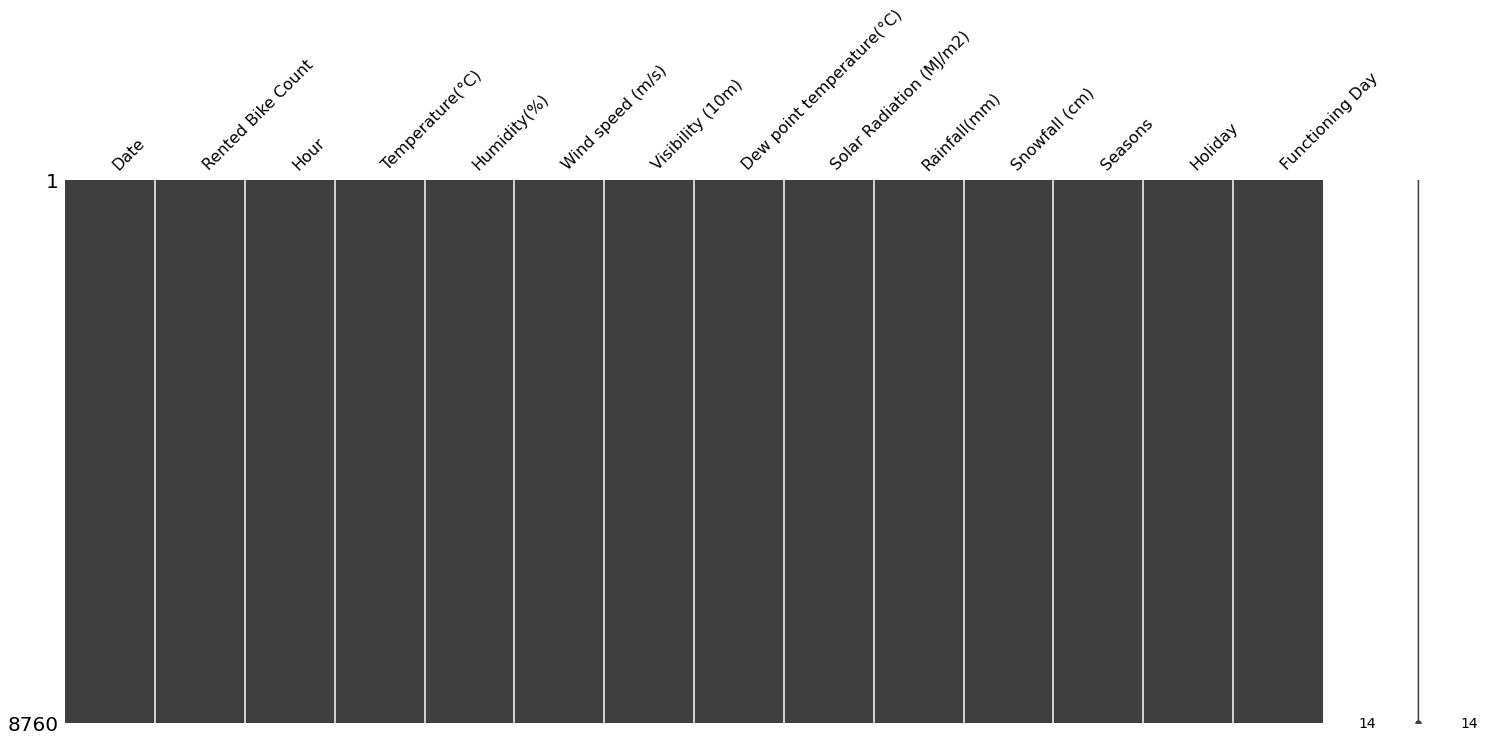

In [223]:
# Checking missing values
import missingno as msno
msno.matrix(data)


No missing values in any of the features.

In [224]:
#rename the column names for easy access
data.rename(columns={'Temperature(°C)':'Temperature', 'Humidity(%)': 'Humidity','Wind speed (m/s)': 'Wind Speed',"Dew point temperature(°C)": 'Dew point temperature','Visibility (10m)':'Visibility', "Solar Radiation (MJ/m2)": 'Solar radiation','Rainfall(mm)':'Rainfall','Snowfall (cm)': 'Snowfall' },inplace=True)

In [225]:
data['Date']=pd.to_datetime(data["Date"])
data['Month']=data['Date'].dt.month


In [226]:
# change the datatype of categorical columns to categorical 
categorical_cols=['Seasons','Holiday','Functioning Day','Hour',"Date","Month"]
for col in categorical_cols:
  data[col]=data[col].astype("category")
Numerical_cols=['Temperature','Humidity','Visibility','Wind Speed','Dew point temperature','Solar radiation','Rainfall','Snowfall']
for col in Numerical_cols :
  data[col] = data[col].astype('float64')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   8760 non-null   category
 1   Rented Bike Count      8760 non-null   int64   
 2   Hour                   8760 non-null   category
 3   Temperature            8760 non-null   float64 
 4   Humidity               8760 non-null   float64 
 5   Wind Speed             8760 non-null   float64 
 6   Visibility             8760 non-null   float64 
 7   Dew point temperature  8760 non-null   float64 
 8   Solar radiation        8760 non-null   float64 
 9   Rainfall               8760 non-null   float64 
 10  Snowfall               8760 non-null   float64 
 11  Seasons                8760 non-null   category
 12  Holiday                8760 non-null   category
 13  Functioning Day        8760 non-null   category
 14  Month                  8760 non-null   c

**Outlier Analysis**

<Figure size 720x360 with 0 Axes>

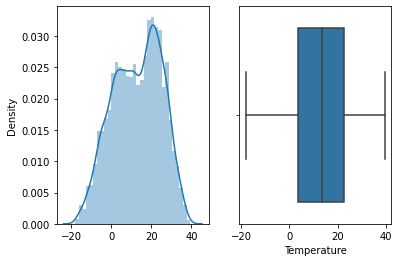

<Figure size 720x360 with 0 Axes>

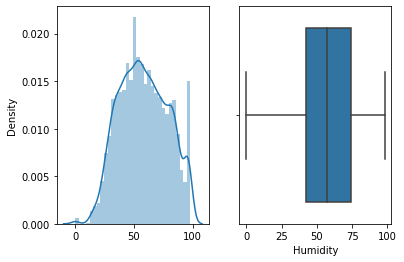

<Figure size 720x360 with 0 Axes>

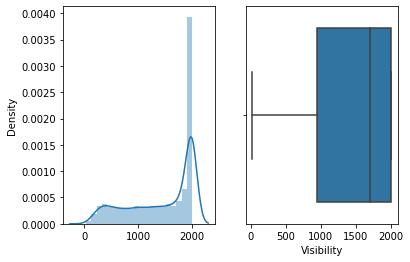

<Figure size 720x360 with 0 Axes>

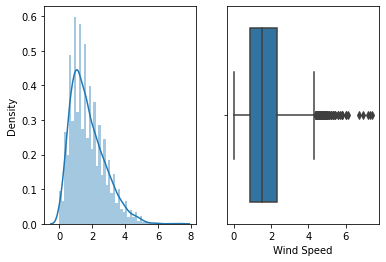

<Figure size 720x360 with 0 Axes>

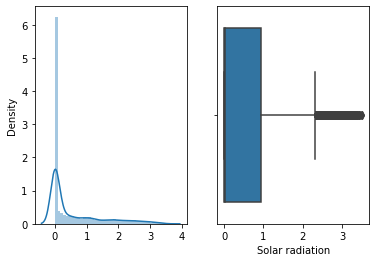

<Figure size 720x360 with 0 Axes>

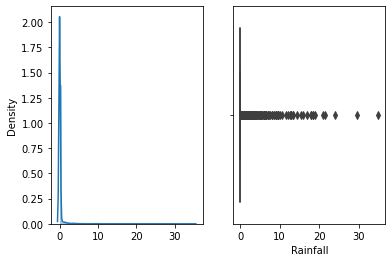

<Figure size 720x360 with 0 Axes>

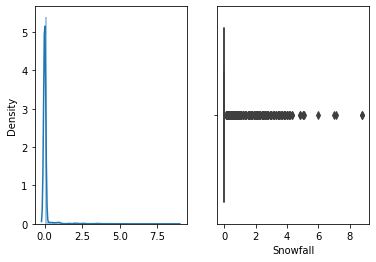

<Figure size 720x360 with 0 Axes>

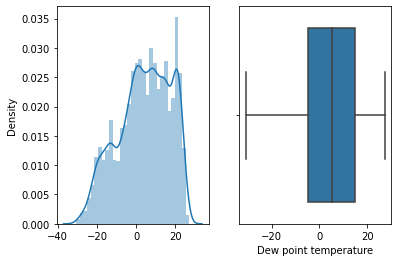

<Figure size 720x360 with 0 Axes>

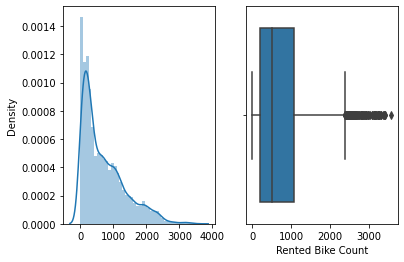

In [227]:
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall','Dew point temperature', 'Rented Bike Count']

for col in numerical_cols[0:]:
    fig = plt.figure(figsize=(10,5))

    feature=data[col]
    fig, axes = plt.subplots(1, 2)
    sns.distplot(x=feature,ax=axes[0])
    sns.boxplot(x=feature,ax=axes[1])
plt.show()

Observation:

* Features namely, Wind Speed, Solar Radiation, Rainfall, Snowfall have outliers.
* Dependent variable 'Rented Bike Count' has outliers.

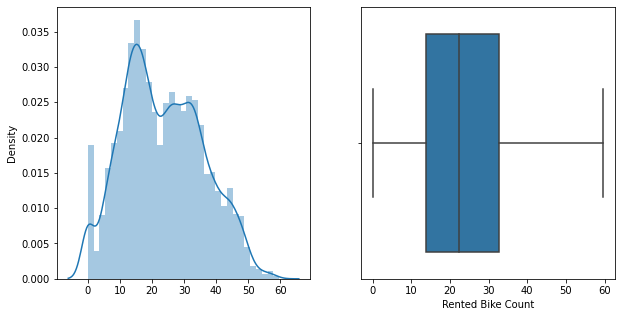

In [228]:
 #Normalizing  our target variable by squre root method

f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.distplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[0])
sns.boxplot(x=np.sqrt(data['Rented Bike Count']),ax=axes[1])

**Correlation Analysis**

Heatmap (correlation matrix)

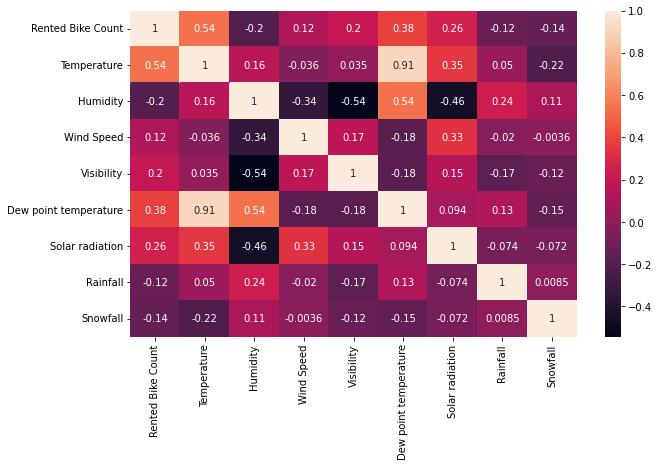

In [229]:
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

Regression Plots 

<Figure size 720x432 with 0 Axes>

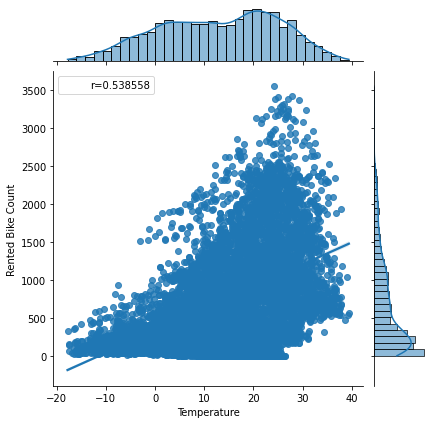

<Figure size 720x432 with 0 Axes>

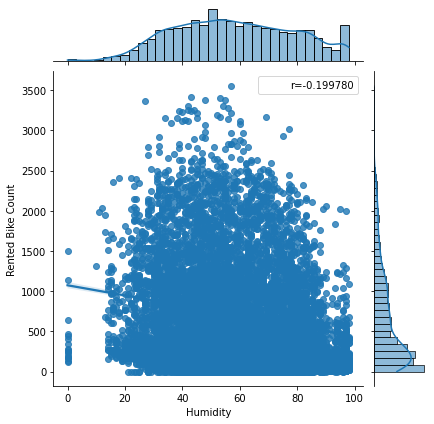

<Figure size 720x432 with 0 Axes>

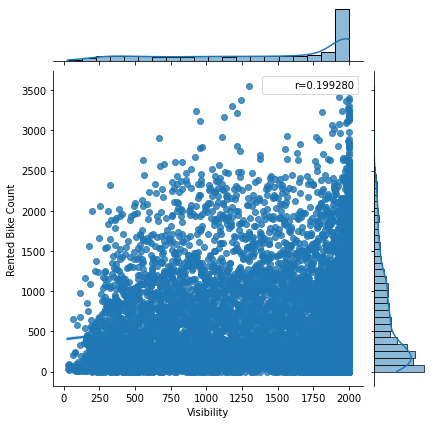

<Figure size 720x432 with 0 Axes>

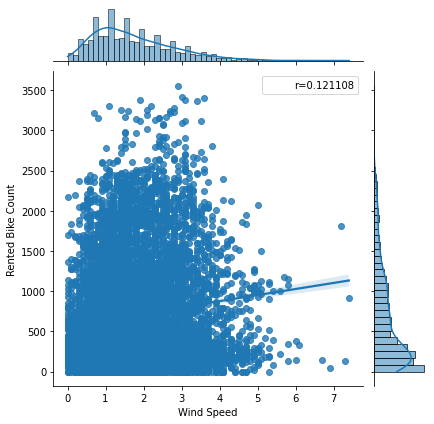

<Figure size 720x432 with 0 Axes>

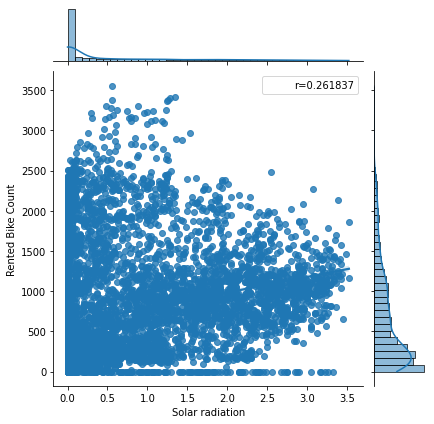

<Figure size 720x432 with 0 Axes>

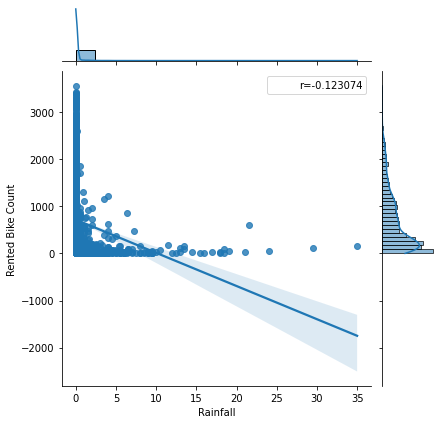

<Figure size 720x432 with 0 Axes>

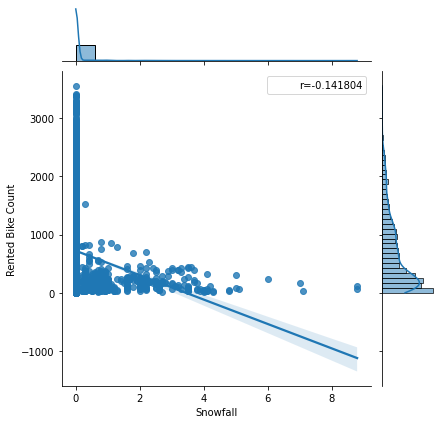

In [230]:
#Plotting regression plots for numerical features of the data along with the target variable.
numerical_cols = ['Temperature','Humidity','Visibility','Wind Speed','Solar radiation','Rainfall','Snowfall']
for col in numerical_cols[0:]:
    fig = plt.figure(figsize=(10, 6))
    feature = data[col]
    label = data['Rented Bike Count']
    graph = sns.jointplot(data=data,x=feature, y=label,kind='reg',ax=ax)
    r, p = stats.pearsonr(feature, label)
    phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
    graph.ax_joint.legend([phantom],['r={:f}'.format(r)])
plt.show()

Observation:

* Temperature has correlation (0.54) with the count of bike-rents.
* Temperature and dew-point temperature are highly correlated. One of the features could be dropped later.
* Humidity is positively correlated(0.54) with dew-point temperature as much as it is negatively correlated(-0.54) with Visibility.
* Solar Radiation has slight negative correlation with Humidity.
* Wind Speed, Rainfall and Snowfall have very less impact on the count of bike-rents. 

**Univariate Analysis**

Bike Rental Count at particular hour of the day

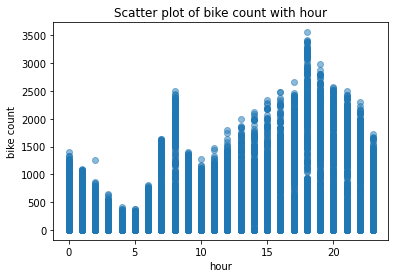

In [231]:
plt.scatter(data['Hour'], data['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()


Bike rentals are the highest during 8:00 am and 6:00 pm. 



Bike Rental Count v/s Year 

[Text(0.5, 1.0, 'Bike Rent Count per year')]

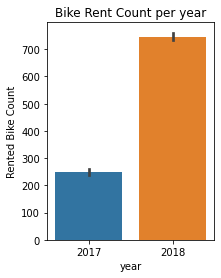

In [232]:
# extract year from the feature "date" to create "year"
year =[]
for i in range(len(data['Date'])):
  year.append(data['Date'][i].year)
data['year'] = year
fig, ax=plt.subplots(figsize=(3,4))
sns.barplot(data=data,x='year',y='Rented Bike Count')
ax.set(title='Bike Rent Count per year')

Data collected over two years.

**Multivariate Analysis**

1. Bike Rental Count v/s Seasons

In [233]:
#bike rental count per season
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [234]:
#plot the bike rental count per season in a pie chart 
seasons_data = data.groupby(['Seasons'])['Rented Bike Count'].max().reset_index().sort_values(by = 'Rented Bike Count', ascending = False)

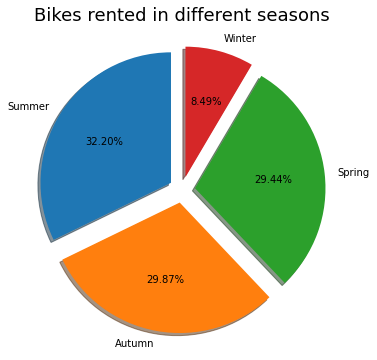

In [235]:
plt.rcParams['figure.figsize'] = (10,6)
rents = seasons_data['Rented Bike Count']
plt.pie(rents, labels = seasons_data['Seasons'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1], shadow = True )
plt.title('Bikes rented in different seasons', {'fontsize': 18})
plt.show()

Bike rental count is highest during summers. (Ideal temperature for use of bikes).

2. Bike Rental Count throughout the day for all seasons

[Text(0.5, 1.0, 'Bikes Rented in different Seasons')]

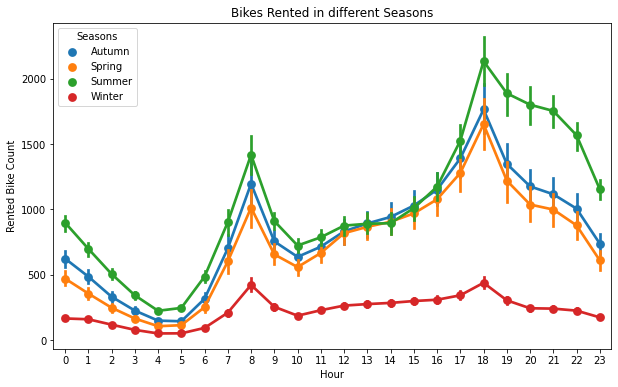

In [236]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Seasons", ax=ax)
ax.set(title="Bikes Rented in different Seasons")

Observation:

* Winter has comparitively lesser bike-rents
* 8:00 am and 6:00 pm are the peak hours of bike-rents
* Bike-rents in the morning are lesser than that of evening 
*Summers have the highest bike-rents. 

3. Bike Rental Count Analysis: Holiday v/s No Holiday 

[Text(0.5, 1.0, 'Bikes Rented on Holidays vs No Holidays')]

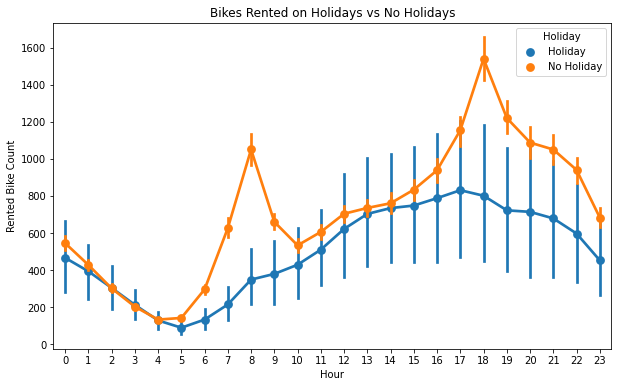

In [237]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Holiday", ax=ax)
ax.set(title="Bikes Rented on Holidays vs No Holidays")

Observation:

* On No Holidays, bike-rents start arount 5:00 am and are highest during the peak hours.
* On Holidays the bike-rents are casually increasing from 8:00 am to 5:00 pm and decrease afterrwards.

4. Bike Rental Count Analysis: Functional Day v/s No Functional Day

[Text(0.5, 1.0, 'Bikes Rented on Functional Days vs No Functional Days')]

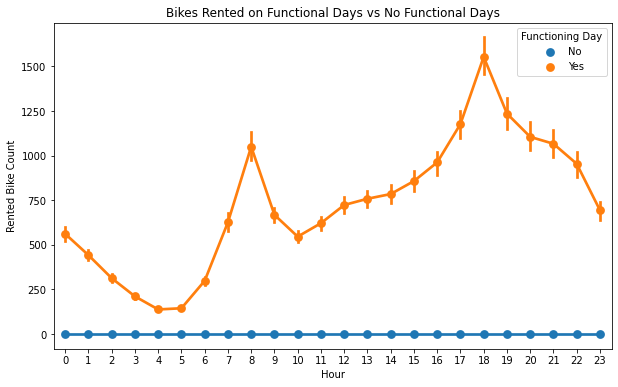

In [238]:
fig,ax= plt.subplots(figsize=(10,6))
sns.pointplot(data=data, x='Hour',y="Rented Bike Count", hue="Functioning Day", ax=ax)
ax.set(title="Bikes Rented on Functional Days vs No Functional Days")

Observation: 

* No bike-rents observed on No Functional days.
* Bike-rents follow regular trend on functional days.

#**Data Preparation**

**Feature Selection**

Multicolinearity Test

* VIF is always greater or equal to 1.
* If VIF = 1 => Not correlated to any of the variables.
* If 1 < VIF < 5 => Moderately correlated.
* VIF > 5 => Highly correlated.
* If there are multiple variables with VIF greater than 5, only remove one of them and find VIF again.

In [240]:
# function to calculate Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    #Calculating VIF for the column X 
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [251]:
num_cols = data._get_numeric_data().columns.to_list()
num_cols


['Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind Speed',
 'Visibility',
 'Dew point temperature',
 'Solar radiation',
 'Rainfall',
 'Snowfall',
 'year']

In [252]:
num_cols.remove('Rented Bike Count')
independent_numerical_cols= num_cols

In [253]:
calculate_vif(data[[i for i in independent_numerical_cols]])

,variables,VIF
0,Temperature,187.482103
1,Humidity,186.517131
2,Wind Speed,4.533706
3,Visibility,10.235595
4,Dew point temperature,126.711067
5,Solar radiation,2.832598
6,Rainfall,1.100442
7,Snowfall,1.125229
8,year,394.869086


In [254]:
data.drop('Dew point temperature',inplace=True,axis=1)


In [255]:
calculate_vif(data[[i for i in independent_numerical_cols if  i not in ['Dew point temperature']]])

,variables,VIF
0,Temperature,3.338775
1,Humidity,21.918844
2,Wind Speed,4.521529
3,Visibility,10.160350
4,Solar radiation,2.702208
5,Rainfall,1.085716
6,Snowfall,1.119727
7,year,47.373886


In [256]:
data.drop('year',inplace=True,axis=1)


In [257]:
calculate_vif(data[[i for i in independent_numerical_cols if  i not in ['Dew point temperature','year']]])

,variables,VIF
0,Temperature,3.166007
1,Humidity,4.758651
2,Wind Speed,4.079926
3,Visibility,4.409448
4,Solar radiation,2.246238
5,Rainfall,1.078501
6,Snowfall,1.118901




---



---



---



In [133]:
data=data.drop(['Date','year'],axis=1)
data

,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Month
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,764,20,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,694,21,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,712,22,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


In [140]:
data_new = data

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['Seasons','Month','Hour','Holiday','Functioning Day']

for col in cols:
    data_new = one_hot_encoding(data_new, col)
data_new.head()

,Rented Bike Count,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,204,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,173,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,107,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,78,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [141]:
df=data_new

In [142]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   float64
 3   Wind Speed           8760 non-null   float64
 4   Visibility           8760 non-null   float64
 5   Solar radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Seasons_Autumn       8760 non-null   uint8  
 9   Seasons_Spring       8760 non-null   uint8  
 10  Seasons_Summer       8760 non-null   uint8  
 11  Seasons_Winter       8760 non-null   uint8  
 12  Month_1              8760 non-null   uint8  
 13  Month_2              8760 non-null   uint8  
 14  Month_3              8760 non-null   uint8  
 15  Month_4              8760 non-null   u

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [144]:
# X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented Bike Count',axis=1)
y=np.sqrt(df['Rented Bike Count'])




In [145]:
X.head()

,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [146]:

# Split data into train test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48,shuffle= True)


In [147]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
# min_max_scaler = MinMaxScaler()
# X_train = min_max_scaler.fit_transform(X_train)
# X_test = min_max_scaler.transform(X_test)
cols=['Temperature','Humidity','Wind Speed','Visibility','Solar radiation','Rainfall','Snowfall']
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])
# scaler.fit(X1)
# X1 = scaler.transform(X1)

In [148]:
X_train.head()

,Temperature,Humidity,Wind Speed,Visibility,Solar radiation,Rainfall,Snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
6991,0.218750,0.59375,-0.714286,0.035186,0.076923,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5542,0.750000,0.59375,0.000000,-0.140277,-0.010989,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3854,0.395833,-0.31250,1.571429,-0.515599,3.527473,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2111,-0.562500,-0.56250,-0.571429,-0.587849,-0.010989,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8269,0.119792,-0.28125,0.857143,-1.082336,2.043956,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [149]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6570, 51)
(6570,)
(2190, 51)
(2190,)


#**Model 1: Linear Regression** 

In [150]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [151]:
# Cheeck coefficents
l_reg.coef_

array([ 9.12052112e+00, -4.38777841e+00, -2.26331199e-01,  4.57056316e-01,
        9.47787238e-01, -1.81033096e+00,  1.15622965e-01, -1.42489788e+11,
       -1.42489788e+11, -1.42489788e+11, -1.42489788e+11,  2.58504974e+09,
        2.58504974e+09,  2.58504974e+09,  2.58504974e+09,  2.58504974e+09,
        2.58504974e+09,  2.58504974e+09,  2.58504974e+09,  2.58504974e+09,
        2.58504974e+09,  2.58504974e+09,  2.58504974e+09,  8.99867352e+09,
        8.99867351e+09,  8.99867351e+09,  8.99867351e+09,  8.99867351e+09,
        8.99867351e+09,  8.99867351e+09,  8.99867352e+09,  8.99867352e+09,
        8.99867352e+09,  8.99867351e+09,  8.99867351e+09,  8.99867351e+09,
        8.99867351e+09,  8.99867351e+09,  8.99867352e+09,  8.99867352e+09,
        8.99867352e+09,  8.99867353e+09,  8.99867352e+09,  8.99867352e+09,
        8.99867352e+09,  8.99867352e+09,  8.99867352e+09,  2.77798758e+10,
        2.77798758e+10,  1.41500765e+10,  1.41500765e+10])

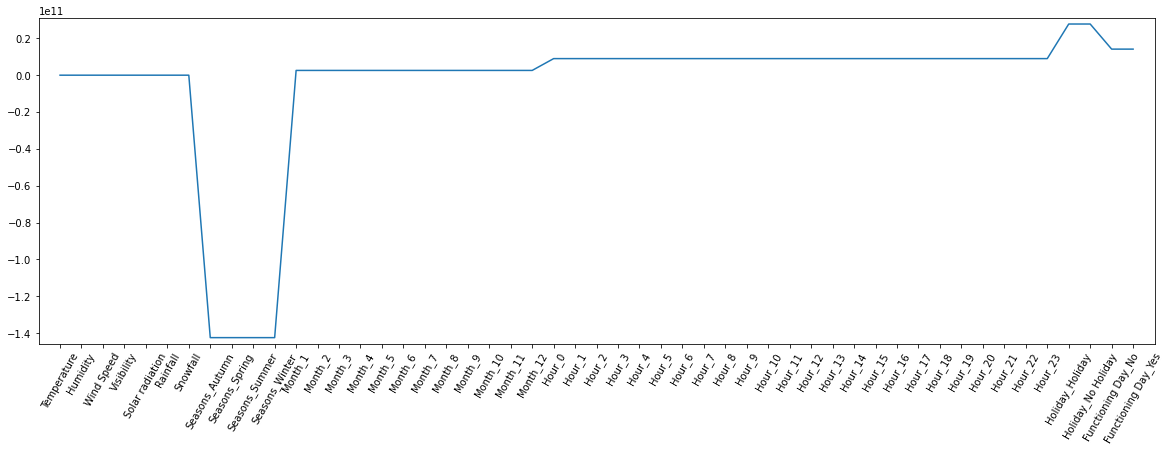

In [152]:
reg_coef = l_reg.coef_
plt.figure(figsize=(20,6))

# Plot the coefficients
plt.plot(range(len(X.columns)), reg_coef)
plt.xticks(range(len(X.columns)), X.columns.values, rotation=60)
plt.margins(0.02)
plt.savefig('linear coefficients')
plt.show()


In [153]:
# get dataframe for x columns and coefficient
pd.DataFrame(l_reg.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Temperature,9.120521e+00
Humidity,-4.387778e+00
Wind Speed,-2.263312e-01
Visibility,4.570563e-01
Solar radiation,9.477872e-01
Rainfall,-1.810331e+00
Snowfall,1.156230e-01
Seasons_Autumn,-1.424898e+11
Seasons_Spring,-1.424898e+11
Seasons_Summer,-1.424898e+11


In [154]:
# Check intercept
l_reg.intercept_

88976112121.70828

In [155]:
#Checking score
l_reg.score(X_train,y_train)

0.7617637311924211

In [156]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=9)
score=cross_val_score(l_reg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [-0.08091466 -0.37746849  0.60071854  0.69677568  0.51188551  0.55640364
  0.42828037  0.80752658  0.77081631]
Average Cross Validation score :0.43489149714848796


In [157]:
# Y peredictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

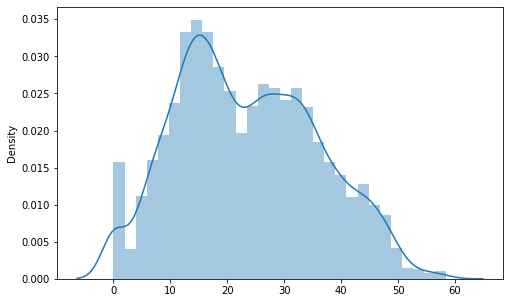

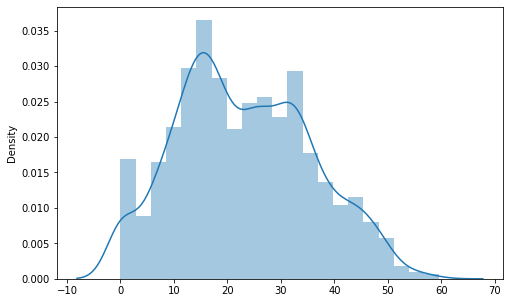

In [158]:
plt.figure(figsize=(8,5))
sns.distplot(x=y_train)
plt.figure(figsize=(8,5))
sns.distplot(x=y_test)


In [159]:
def evaluation(model,y_actual,y_pred):
  

  #Calculate Mean Absolute Error.
  MAE= mean_absolute_error(y_actual,y_pred)
  # print(f"The Mean Absolute Error (MAE) is {MAE}.")

  #Calculate  Mean Squared Error
  MSE=mean_squared_error(y_actual,y_pred)
  # print(f"The Mean Squred Error(MSE) is {MSE}.")

  #Calculate Root Mean Squared Error
  RMSE=np.sqrt(MSE)
  # print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

  #Calculate R2 Score
  R2=r2_score(y_actual,y_pred)
  print(f"The R2 Score is {R2}.")

  var_test = y_actual.var()
  Adj_rsquare = 1-(MSE/var_test)
  # print(f"The Adjusted R2 Score is {Adj_rsquare}.")

  dictionary={'Model':model,
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4),
             'Adjusted R2_score': round(Adj_rsquare,4)}
  # create training_result dataframe
  return pd.DataFrame(dictionary,index=[1])


In [160]:
# Evaluation of training data set
evaluation("Linear regression-train",y_train,y_pred_train)

The R2 Score is 0.7617637311924211.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear regression-train,4.6122,36.6121,6.0508,0.7618,0.7618



Evaluation of Test data set

In [161]:
evaluation("Linear regression-test",y_test,y_pred)

The R2 Score is 0.7466047860044289.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Linear regression-test,4.7773,40.2605,6.3451,0.7466,0.7467


On testing data R2 score is 0.6183 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed. We need to improve our model performance.

In [162]:
# define a fucntion to visualize predicted y values with actual y values:
def line_plot(y_pred,y_test): 

  plt.figure(figsize=(10,6))
  plt.plot(y_pred)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual Bike Rental Count")
  plt.show()

def scatter_plot(y_pred,y_test): 

  plt.figure(figsize=(8,5))
  sns.regplot(x=y_test,y=y_pred,line_kws={'color':'black'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted Bike Rental Count")

def residual_plot(y_pred,y_test):
  plt.figure(figsize=(8,5))
  sns.distplot(x=y_test-y_pred)
  plt.title("Residual Distribution Plot")

def homoscedasticity_plot(y_pred,y_test):
  plt.figure(figsize=(8,5))
  sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
  plt.ylabel('Residuals')
  plt.xlabel('y_predicted')
  plt.title("Residuals vs predicted values")


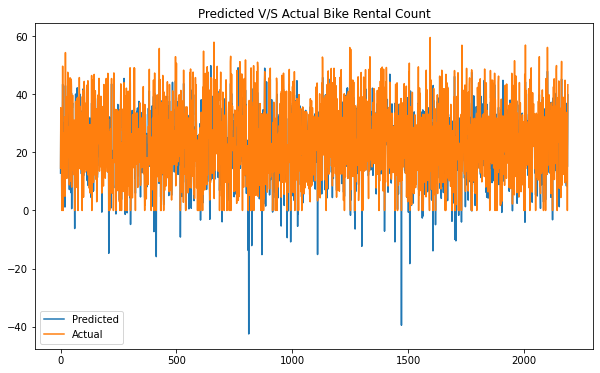

In [163]:
line_plot(y_pred,y_test)


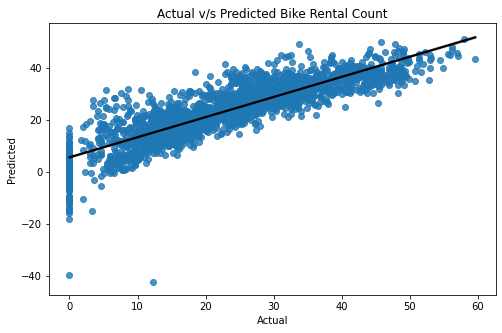

In [164]:
scatter_plot(y_pred,y_test)

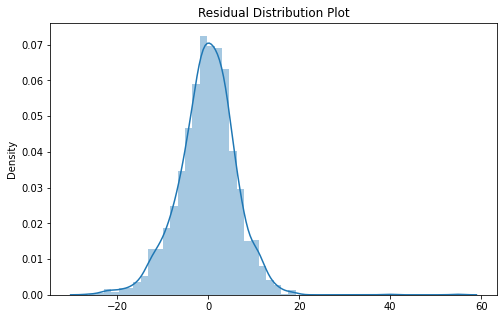

In [165]:
residual_plot(y_pred,y_test)
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
# Mean of residuals should be zero or close to 0 as much as possible. It is done to check whether our line is actually the line of “best fit” 


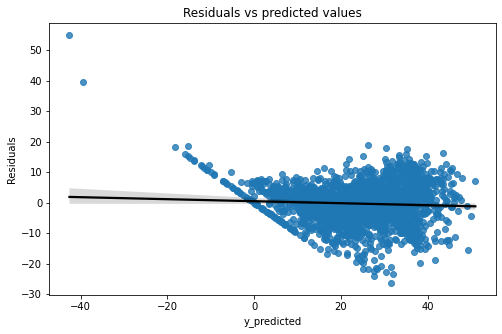

In [166]:
homoscedasticity_plot(y_pred,y_test)


#**Model 2: Regularized Regression**

* Lasso Regression (L1 Regularization)
* Ridge Regression (L2 Regularization) 

Lasso Regression


In [167]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_reg=Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_reg, parameters, scoring='neg_mean_squared_error', cv=5)
# calling train_linear_model to train,fit and evalution of lasso model
# train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

In [168]:
lasso_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [169]:
print("Tuned Decision lasso Parameters: {}".format(lasso_grid.best_params_))
print("Best score is {}".format(lasso_grid.best_score_))

Tuned Decision lasso Parameters: {'alpha': 0.0001}
Best score is -37.211211064577164


In [170]:
best_lasso_model = lasso_grid.best_estimator_
best_lasso_model.coef_ # This should be what you're looking for

# y_pred = best_model.predict(X_test)

array([ 9.12052860e+00, -4.38833089e+00, -2.25764528e-01,  4.56750373e-01,
        9.44400137e-01, -1.81034125e+00,  1.14935555e-01,  4.59853018e+00,
        1.60336232e+00,  1.14965860e+00, -2.34473712e+00, -4.47919614e-01,
       -1.10163857e+00, -1.01972274e-01,  0.00000000e+00,  1.07057409e+00,
        3.62133514e+00, -4.44653864e-01, -1.10856671e+00, -4.32304430e-01,
        1.13528496e+00,  3.74687728e-01,  6.91550391e-01, -6.41452981e-01,
       -3.05797380e+00, -5.58884117e+00, -8.19087908e+00, -9.81268964e+00,
       -1.02792730e+01, -5.22390462e+00,  1.25969908e+00,  6.80608491e+00,
        3.11004152e-01, -4.33231273e+00, -4.33576503e+00, -3.67725581e+00,
       -4.07573597e+00, -4.11118666e+00, -2.61097919e+00, -6.93184373e-01,
        3.24617245e+00,  9.17905640e+00,  6.57490394e+00,  5.68344403e+00,
        5.60227593e+00,  4.59732592e+00,  9.18075988e-01, -2.70436336e+00,
        3.75917863e-13, -2.82091116e+01,  1.02607052e-12])

In [171]:
# get dataframe of x columns and Coeficients
pd.DataFrame(best_lasso_model.coef_,X.columns,columns=['Coeficients']).reset_index().rename(columns={'index':'X'})

,X,Coeficients
0,Temperature,9.120529e+00
1,Humidity,-4.388331e+00
2,Wind Speed,-2.257645e-01
3,Visibility,4.567504e-01
4,Solar radiation,9.444001e-01
5,Rainfall,-1.810341e+00
6,Snowfall,1.149356e-01
7,Seasons_Autumn,4.598530e+00
8,Seasons_Spring,1.603362e+00
9,Seasons_Summer,1.149659e+00


In [172]:
# Check score on train dataset
best_lasso_model.score(X_train,y_train)

0.7617636827081301

In [173]:
# Check score on test dataset
best_lasso_model.score(X_test,y_test)

0.7466105521401272

In [174]:
# Check intercept
best_lasso_model.intercept_

24.32104904885596

In [175]:
# y prdiction on train data
y_pred_train_lasso=best_lasso_model.predict(X_train)
# y prdiction on test data
y_pred_lasso=best_lasso_model.predict(X_test)

Evaluation On Train Data.

In [176]:
evaluation("Lasso regression-train",y_train,y_pred_train_lasso)

The R2 Score is 0.7617636827081301.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Lasso regression-train,4.6122,36.6121,6.0508,0.7618,0.7618


Evaluation On Test Data.

In [177]:
evaluation("Lasso regression-test",y_test,y_pred_lasso)

The R2 Score is 0.7466105521401272.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Lasso regression-test,4.7773,40.2596,6.345,0.7466,0.7467


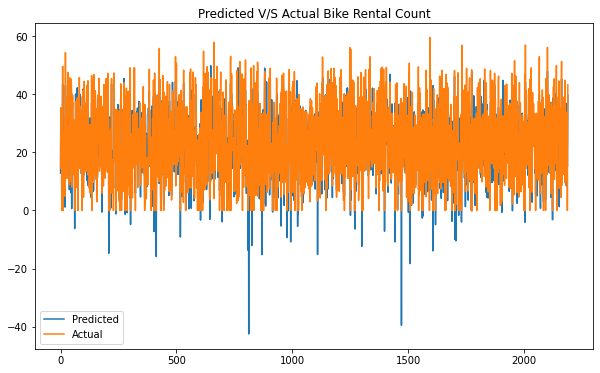

In [178]:
line_plot(y_pred_lasso,y_test)

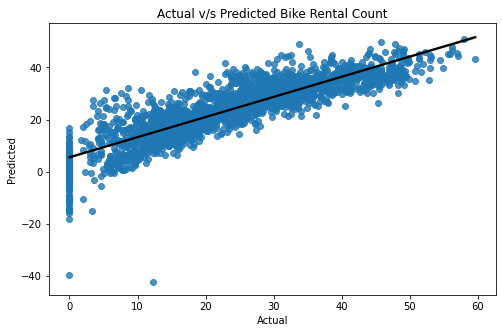

In [179]:
scatter_plot(y_pred_lasso,y_test)

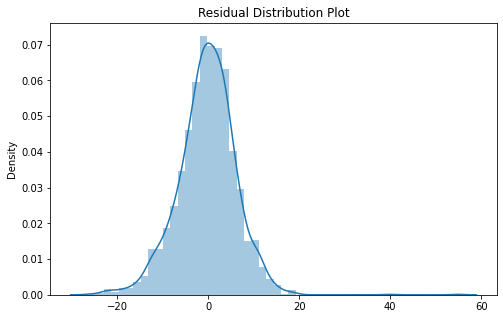

In [180]:
residual_plot(y_pred_lasso,y_test)

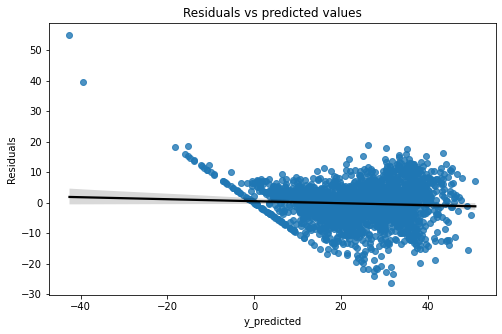

In [181]:
homoscedasticity_plot(y_pred_lasso,y_test)

Ridge Regression

In [182]:
# instantiating
ridge_lg=Ridge()


In [183]:
# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge_lg, parameters, scoring='neg_mean_squared_error', cv=3)

In [184]:
# fitting and training
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [185]:
best_ridge_model = ridge_grid.best_estimator_
best_ridge_model.coef_ # This should be what you're looking for


array([  9.12010246,  -4.39372233,  -0.22114305,   0.45733641,
         0.93304791,  -1.80960953,   0.11502097,   3.33858433,
         0.35304601,  -0.09351546,  -3.59811489,  -0.71943052,
        -1.37359644,  -0.37382589,  -0.2698122 ,   0.80249332,
         3.34130534,  -0.7152999 ,  -1.37902494,  -0.71030955,
         0.86847016,   0.1084325 ,   0.42059812,   0.28601549,
        -2.12211637,  -4.64106372,  -7.23452699,  -8.85055985,
        -9.31519436,  -4.27816224,   2.18799368,   7.71450732,
         1.24866623,  -3.37867488,  -3.37799036,  -2.72060089,
        -3.11927341,  -3.1551021 ,  -1.66299753,   0.24331828,
         4.16809808,  10.07670753,   7.47689152,   6.5901946 ,
         6.51005199,   5.50986762,   1.84395035,  -1.35047262,
         1.35047262, -14.06398428,  14.06398428])

In [186]:
print("Tuned Decision lasso Parameters: {}".format(ridge_grid.best_params_))
print("Best score is {}".format(ridge_grid.best_score_))

Tuned Decision lasso Parameters: {'alpha': 1}
Best score is -37.24170677329093


In [187]:
# get dataframe for x columns and coeff
pd.DataFrame(best_ridge_model.coef_,X.columns,columns=['Coefficients'])

,Coefficients
Temperature,9.120102
Humidity,-4.393722
Wind Speed,-0.221143
Visibility,0.457336
Solar radiation,0.933048
Rainfall,-1.809610
Snowfall,0.115021
Seasons_Autumn,3.338584
Seasons_Spring,0.353046
Seasons_Summer,-0.093515


In [188]:
# Check intercept
best_ridge_model.intercept_

9.49788892281094

In [189]:
# y predictions on training dataset
y_pred_train_ridge=best_ridge_model.predict(X_train)
# y predictions on test dataset
y_pred_ridge=best_ridge_model.predict(X_test)

Evaluation On Train Data.

In [190]:
evaluation("Ridge regression-train",y_train,y_pred_train_ridge)

The R2 Score is 0.7617597128137032.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Ridge regression-train,4.6128,36.6127,6.0508,0.7618,0.7618



Evaluation On Test Data.

In [191]:
evaluation("Ridge regression-test",y_test,y_pred_ridge)

The R2 Score is 0.7466481360519756.


,Model,MAE,MSE,RMSE,R2_score,Adjusted R2_score
1,Ridge regression-test,4.7781,40.2536,6.3446,0.7466,0.7468


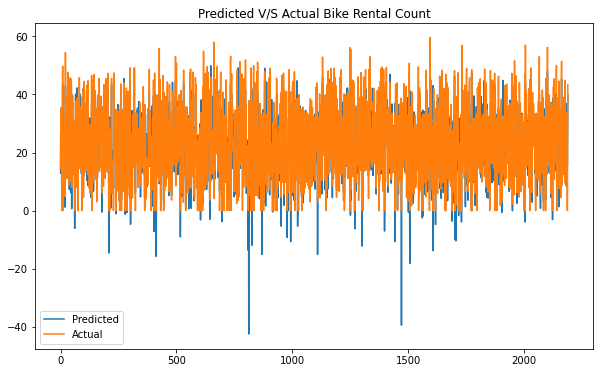

In [192]:
line_plot(y_pred_ridge,y_test)

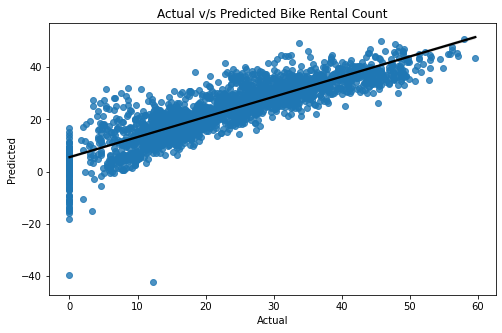

In [193]:
scatter_plot(y_pred_ridge,y_test)

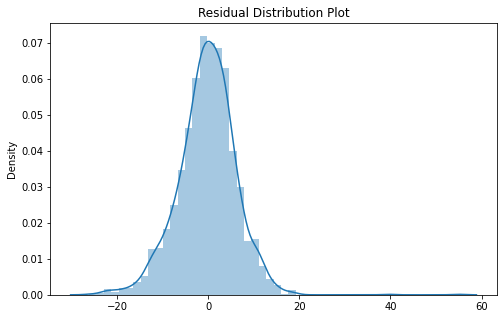

In [194]:
residual_plot(y_pred_ridge,y_test)

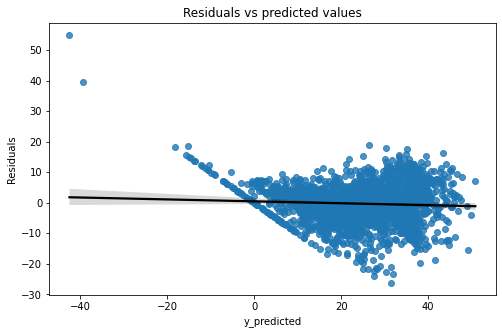

In [195]:
homoscedasticity_plot(y_pred_ridge,y_test)

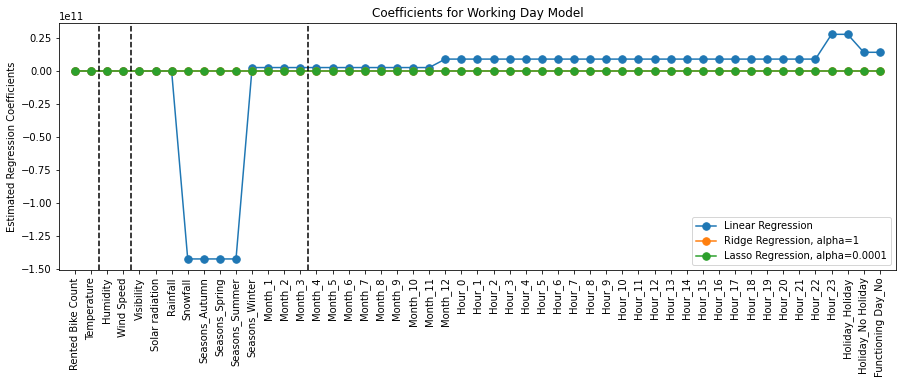

In [196]:
# Plotting the feature coefficients for Linear, Ridge and Lasso Regression Models
fig = plt.figure(figsize=(15,10))
    
# Working day plot
axes = fig.add_subplot(2, 1, 1)
axes.plot(l_reg.coef_, label='Linear Regression', marker='.', markersize=15)
axes.plot(best_ridge_model.coef_, label='Ridge Regression, alpha={}'.format(ridge_grid.best_params_['alpha']), marker='.', markersize=15)
axes.plot(best_lasso_model.coef_, label='Lasso Regression, alpha={}'.format(lasso_grid.best_params_['alpha']), marker='.', markersize=15)
axes.axvline(2-0.5, c='k', ls='--')
axes.axvline(4-0.5,  c='k', ls='--')
axes.axvline(15-0.5,  c='k', ls='--')
plt.xticks(range(len(l_reg.coef_)), df.columns, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for Working Day Model')
axes.set(xlim=[-1, len(l_reg.coef_)])
axes.legend()

# ElasticNet

In [197]:
# Cross validation

elastic_regressor= ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_grid = GridSearchCV(elastic_regressor, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_grid.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# print best parameters and best score
print(f'The best alpha value is {elastic_grid.best_params_}')
print(f'The best negative mean squred error value is {elastic_grid.best_score_}')


In [ ]:
# Check score on Train dataset
elastic_grid.score(X_train,y_train)

In [ ]:
# check score on Test dataset.
elastic_grid.score(X_test,y_test)

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train_elastic_grid=elastic_grid.predict(X_train)
#  predicting y_predictions from  X test values
y_pred_elastic_grid=elastic_grid.predict(X_test)

In [ ]:
evaluation("Elastic Net Regression GridSearch CV-train",y_train,y_pred_train_elastic_grid)

In [ ]:
evaluation("Elastic Net Regression GridSearch CV-test",y_test,y_pred_elastic_grid)

In [ ]:
line_plot(y_pred_elastic_grid,y_test)

In [ ]:
scatter_plot(y_pred_elastic_grid,y_test)

In [ ]:
residual_plot(y_pred_elastic_grid,y_test)

In [ ]:
homoscedasticity_plot(y_pred_elastic_grid,y_test)

# *Decision Tree Regressor*

In [ ]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor
# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')
# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

In [ ]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

In [ ]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train_decision=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred_decision=D_tree.predict(X_test)

In [ ]:
evaluation("Decision Tree regression-train",y_train,y_pred_train_decision)

In [ ]:
evaluation("Decision Tree regression-test",y_test,y_pred_decision)

In [ ]:
line_plot(y_pred_decision,y_test)

In [ ]:
scatter_plot(y_pred_decision,y_test)

In [ ]:
residual_plot(y_pred_decision,y_test)

In [ ]:
homoscedasticity_plot(y_pred_decision,y_test)

In [ ]:
# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,11,20,100],
           "max_features":["auto","log2"] }

In [ ]:
tuning_model=GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)


In [ ]:
tuning_model.best_params_

In [ ]:

D_tree_grid=DecisionTreeRegressor(max_depth=20,max_features='auto',splitter='best')
D_tree_grid.fit(X_train,y_train)

In [ ]:
# Check score on Train dataset
D_tree_grid.score(X_train,y_train)

In [ ]:
# check score on Test dataset.
D_tree_grid.score(X_test,y_test)

In [ ]:
#  predicting y_train_predictions from  X train values
y_pred_train_decision_grid=D_tree_grid.predict(X_train)
#  predicting y_predictions from  X test values
y_pred_decision_grid=D_tree_grid.predict(X_test)

In [ ]:
evaluation("Decision Tree GridSearchCV-train",y_train,y_pred_train_decision_grid)

In [ ]:
evaluation("Decision Tree GridSearchCV-test",y_test,y_pred_decision_grid)

In [ ]:
line_plot(y_pred_decision_grid,y_test)

In [ ]:
scatter_plot(y_pred_decision_grid,y_test)

In [ ]:
residual_plot(y_pred_decision_grid,y_test)

In [ ]:
homoscedasticity_plot(y_pred_decision_grid,y_test)

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

In [ ]:
rf.score(X_train,y_train)

In [ ]:
rf.score(X_test,y_test)

In [ ]:
y_pred_train_rf=rf.predict(X_train)
y_pred_rf=rf.predict(X_test)

In [ ]:
evaluation("Random Forest-train",y_train,y_pred_train_rf)

In [ ]:
evaluation("Random Forest-test",y_test,y_pred_rf)

In [ ]:
line_plot(y_pred_rf,y_test)

In [ ]:
scatter_plot(y_pred_rf,y_test)

In [ ]:
residual_plot(y_pred_rf,y_test)

In [ ]:
homoscedasticity_plot(y_pred_rf,y_test)

#GridSearchCV On random Forest

In [ ]:
param={'n_estimators':[15,25,50,40,80,100,150,200],'max_depth':[3,4,5,6,7,8,9,10,20,25,30]}

In [ ]:

rf_reg=RandomForestRegressor()
rf_tuning=GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=8)
rf_tuning.fit(X_train,y_train)

In [ ]:
rf_tuning.best_params_

In [ ]:
rf_grid=RandomForestRegressor(max_depth=30,n_estimators=200)
rf_grid.fit(X_train,y_train)

In [ ]:

rf_grid.score(X_train,y_train)

In [ ]:

rf_grid.score(X_test,y_test)

In [ ]:
y_pred_train_rf_grid=rf.predict(X_train)
y_pred_rf_grid=rf.predict(X_test)

In [ ]:
evaluation("Random Forest-train",y_train,y_pred_train_rf_grid)

In [ ]:
evaluation("Random Forest-test",y_test,y_pred_rf_grid)

In [ ]:
scatter_plot(y_pred_rf_grid,y_test)

In [ ]:
residual_plot(y_pred_rf_grid,y_test)

In [ ]:
homoscedasticity_plot(y_pred_rf_grid,y_test)

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradboost_reg=GradientBoostingRegressor()
gradboost_reg.fit(X_train,y_train)

In [ ]:
gradboost_reg.score(X_train,y_train)

In [ ]:
gradboost_reg.score(X_test,y_test)

In [ ]:
y_pred_train_gb=gradboost_reg.predict(X_train)
y_pred_gb=gradboost_reg.predict(X_test)

In [ ]:
evaluation("Gradient Boosting-train",y_train,y_pred_train_gb)

In [ ]:
evaluation("Gradient Boosting-test",y_test,y_pred_gb)

In [ ]:
line_plot(y_pred_gb,y_test)

In [ ]:
scatter_plot(y_pred_gb,y_test)

In [ ]:
residual_plot(y_pred_gb,y_test)

In [ ]:
homoscedasticity_plot(y_pred_rf,y_test)

#GridSearchCV on Gradient Boosting Regressor

In [ ]:
gb_grid=GradientBoostingRegressor()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.08],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1,0.8],
                  'n_estimators' : [50,80,100,150,200],
                  'max_depth'    : [4,6,8,10,20]
                 }              
# 1)n_estimators : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
# 2)learning_rate:Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
# 3)max_depth : Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; 
#the best value depends on the interaction of the input variables.

#4)subsample, default=1.0
#The fraction of samples to be used for fitting the individual base learners. 
#If smaller than 1.0 this results in Stochastic Gradient Boosting. 
#subsample interacts with the parameter n_estimators. 
#Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

In [ ]:
#Gridsearch
gb_grad_tuning=GridSearchCV(gb_grid,param_grid=parameters,cv=5,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
gb_grad_tuning.fit(X_train,y_train)


In [ ]:
# get best paramters to use
gb_grad_tuning.best_params_

In [ ]:
  # USing best paramters tunned by GridsearchCv 
gradboosting_grid=GradientBoostingRegressor(learning_rate=0.03,max_depth=20,n_estimators=150,subsample=0.2)
gradboosting_grid.fit(X_train,y_train)

In [ ]:
  # checking score on train data
gradboosting_grid.score(X_train,y_train)


In [ ]:
#checking score on test data
gradboosting_grid.score(X_test,y_test)

In [ ]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train_gb_grid=gradboosting_grid.predict(X_train)
# y predictions on test data
y_pred_gb_grid=gradboosting_grid.predict(X_test)

In [ ]:
evaluation("Graddient Boosting GridSearchCV-train",y_train,y_pred_train_gb_grid)

In [ ]:
evaluation("Graddient Boosting GridSearchCV-test",y_test,y_pred_gb_grid)

In [ ]:
line_plot(y_pred_gb_grid,y_test)

In [ ]:
scatter_plot(y_pred_gb_grid,y_test)

In [ ]:
residual_plot(y_pred_gb_grid,y_test)

In [ ]:
homoscedasticity_plot(y_pred_gb_grid,y_test)